In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import seaborn as sns

In [2]:
df = pd.read_csv('../data/zingat_preprocessed.csv')
reg = df.drop(['Unnamed: 0',"il","ilce","mahalle","oda_sayisi","fiyat_araligi"], axis = 1)

In [3]:
X = reg.drop(["fiyat"],axis=1)
y = reg["fiyat"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

lin_reg.score(X_test, y_test)

0.3035521169490957

In [5]:
dt_reg =  DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

dt_reg.score(X_test, y_test)

0.34975883298155397

In [6]:
rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)

rfr_reg.score(X_test, y_test)

0.6510651618648069

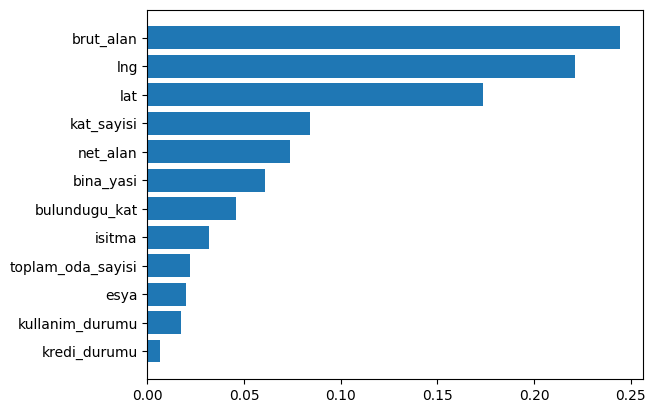

In [7]:
f_i = list(zip(X_test.columns,rfr_reg.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [8]:
X_train = X_train.drop("kredi_durumu",axis=1)
X_test = X_test.drop("kredi_durumu",axis=1)

rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.6491972927372511

İstanbul random forest

In [9]:
df_ist = df[df.il == "İstanbul"]
reg_ist = df_ist.drop(['Unnamed: 0',"il","ilce","mahalle","oda_sayisi","fiyat_araligi"], axis = 1)

In [10]:
X = reg_ist.drop(["fiyat"],axis=1)
y = reg_ist["fiyat"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.6965594289801113

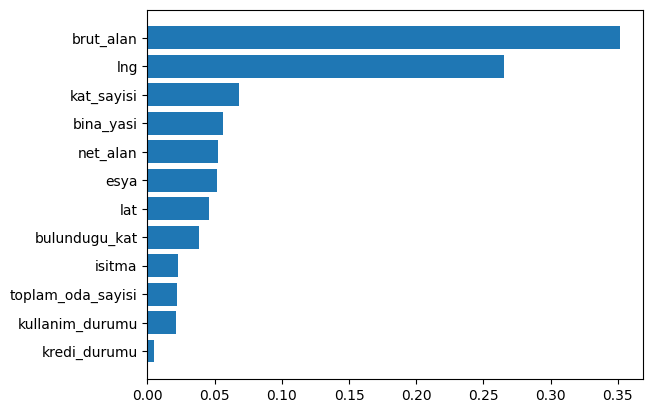

In [12]:
f_i = list(zip(X_test.columns,rfr_reg.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [13]:
X_train = X_train.drop("kredi_durumu",axis=1)
X_test = X_test.drop("kredi_durumu",axis=1)

rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.7097943150114303

In [14]:
X_train = X_train.drop("kullanim_durumu",axis=1)
X_test = X_test.drop("kullanim_durumu",axis=1)
X_train = X_train.drop("isitma",axis=1)
X_test = X_test.drop("isitma",axis=1)

rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.748688968002907

Sakarya Random Forest

In [15]:
df_skr = df[df.il == "Sakarya"]
reg_skr = df_skr.drop(["kredi_durumu",'Unnamed: 0',"il","ilce","mahalle","oda_sayisi","fiyat_araligi"], axis = 1)

In [16]:
X = reg_skr.drop(["fiyat"],axis=1)
y = reg_skr["fiyat"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.5383055463147388